# Python Basics 20
## SciPy - Advanced Applications
***
This notebook covers:
- Digital Signal Processing with `scipy.signal`
- Linear Algebra with `scipy.linalg`
- Statistical Calculations with `scipy.stats`
- Multidimensional Image Processing with `scipy.ndimage`
***

## 1 Digital Signal Processing
The module `scipy.signal` offers extensive functions for signal processing, including filters, spectral analysis and signal transformation. <br>

```python
from scipy import signal
import numpy as np
# Example: Generation of a signal with multiple frequencies
t = np.linspace(0, 1, 1000)
signal_clean = np.sin(2*np.pi*10*t) + 0.5*np.sin(2*np.pi*20*t)
# Adding noise
signal_noisy = signal_clean + np.random.normal(0, 0.5, t.shape)
# Butterworth low-pass filter
b, a = signal.butter(4, 15, 'low', fs=1000)
signal_filtered = signal.filtfilt(b, a, signal_noisy)
```

#### 1.1 Exercises:
> (a) Create a signal consisting of three sine waves with frequencies 5 Hz, 50 Hz and 100 Hz. <br>
>
> (b) Calculate and plot the power spectrum of the signal using `signal.periodogram`. <br>
>
> (c) Design a bandpass filter that only passes the 50 Hz component. <br>
>
> (d) Compare the filtered signal with the original signal in the time and frequency domain.

In [1]:
# Your Solution:





#### Lösung:

Text(0.5, 1.0, 'Power Spectrum Filtered')

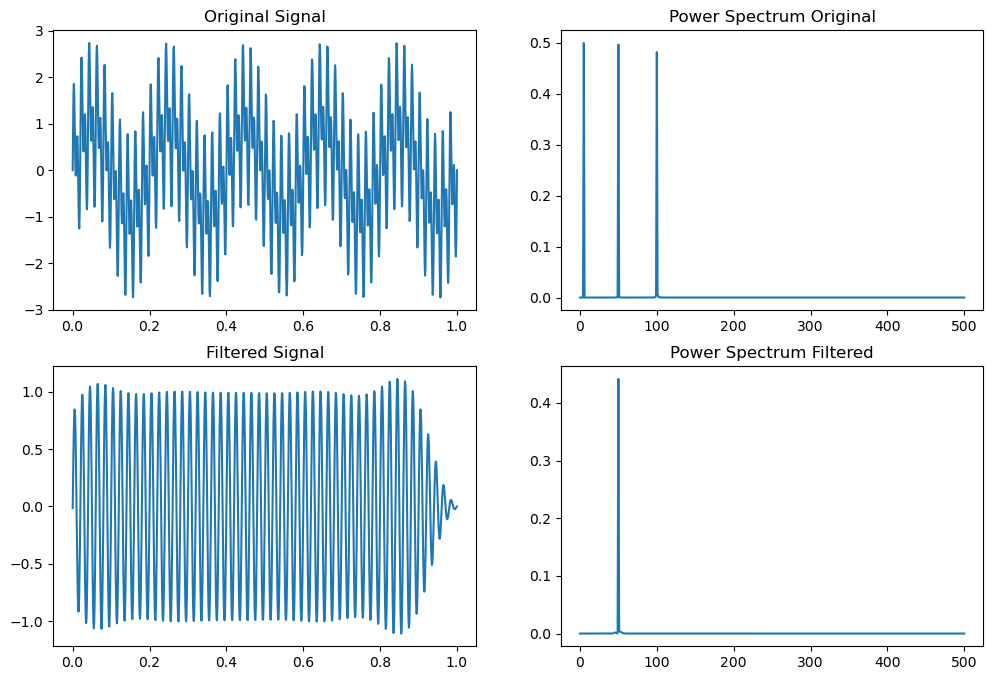

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
# Signal generation
t = np.linspace(0, 1, 1000)
f1, f2, f3 = 5, 50, 100
signal_orig = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)
# Spectral analysis
f, Pxx = signal.periodogram(signal_orig, fs=1000)
# Bandpass filter
b, a = signal.butter(4, [45, 55], 'bandpass', fs=1000)
signal_gefiltert = signal.filtfilt(b, a, signal_orig)
# Spectrum of the filtered signal
f_filt, Pxx_filt = signal.periodogram(signal_gefiltert, fs=1000)
# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.plot(t, signal_orig)
plt.title('Original Signal')
plt.subplot(222)
plt.plot(f, Pxx)
plt.title('Power Spectrum Original')
plt.subplot(223)
plt.plot(t, signal_gefiltert)
plt.title('Filtered Signal')
plt.subplot(224)
plt.plot(f_filt, Pxx_filt)
plt.title('Power Spectrum Filtered')

## 2 Linear Algebra
The module `scipy.linalg` extends the functionality of `numpy.linalg` with advanced linear algebra operations. <br>

```python
from scipy import linalg
import numpy as np
# Example: Solving a linear system of equations
A = np.array([[1, 2], [3, 4]])
b = np.array([5, 6])
# Solution with different methods
x_solve = linalg.solve(A, b)
x_lu = linalg.lu_solve(linalg.lu_factor(A), b)
```

#### 2.1 Exercises:
> (a) Calculate the eigenvalues and eigenvectors of a 3x3 matrix using `linalg.eig`. <br>
>
> (b) Perform a QR decomposition of a matrix and verify the result. <br>
>
> (c) Solve an overdetermined system of equations using the least squares method. <br>

In [3]:
# Your Solution:





#### Solution:

In [4]:
import numpy as np
from scipy import linalg
# Exercise a: Eigenvalues and Eigenvectors
A = np.array([[4, -2, 1], [-2, 3, -1], [1, -1, 2]])
eigvals, eigvecs = linalg.eig(A)
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)
# Exercise b: QR Decomposition
Q, R = linalg.qr(A)
print("\nQR Decomposition Verification:")
print("||QR - A|| =", np.linalg.norm(Q @ R - A))
# Exercise c: Overdetermined System
m, n = 5, 3
X = np.random.rand(m, n)
y = np.random.rand(m)
beta, residuals, rank, s = linalg.lstsq(X, y)
print("\nLeast Squares Solution:", beta)

Eigenvalues: [6.04891734+0.j 1.64310413+0.j 1.30797853+0.j]
Eigenvectors:
 [[ 0.73697623 -0.59100905  0.32798528]
 [-0.59100905 -0.32798528  0.73697623]
 [ 0.32798528  0.73697623  0.59100905]]

QR Decomposition Verification:
||QR - A|| = 1.137640067256873e-15

Least Squares Solution: [-0.58677941  0.42635144  0.91194192]


## 3 Statistical Calculations
The module `scipy.stats` offers a large selection of probability distributions and statistical tests. <br>
```python
from scipy import stats
import numpy as np
# Example: Fitting a normal distribution
daten = np.random.normal(loc=10, scale=2, size=1000)
mittelwert, std = stats.norm.fit(daten)
```
#### 3.1 Exercises:
> (a) Perform a Kolmogorov-Smirnov test to check if data is normally distributed. <br>
>
> (b) Calculate a confidence interval for the mean of a sample. <br>
>
> (c) Perform a t-test for two independent samples. <br>
>
> (d) Calculate the Pearson correlation between two variables and test its significance.

In [5]:
# Your Solution:





#### Solution:

In [6]:
from scipy import stats
import numpy as np
# Exercise a: Kolmogorov-Smirnov Test
daten = np.random.normal(loc=0, scale=1, size=100)
ks_statistik, p_wert = stats.kstest(daten, 'norm')
print("KS Test p-value:", p_wert)
print(ks_statistik)
# Exercise b: Confidence Interval
mittelwert = np.mean(daten)
conf_interval = stats.t.interval(confidence=0.95, df=len(daten)-1,
                               loc=mittelwert,
                               scale=stats.sem(daten))
print("\nConfidence Interval:", conf_interval)
# Exercise c: t-Test
gruppe1 = np.random.normal(loc=0, scale=1, size=50)
gruppe2 = np.random.normal(loc=0.5, scale=1, size=50)
t_stat, p_wert = stats.ttest_ind(gruppe1, gruppe2)
print("\nt-Test p-value:", p_wert)
# Exercise d: Pearson Correlation
x = np.random.normal(0, 1, 100)
y = 2*x + np.random.normal(0, 0.5, 100)
r, p_wert = stats.pearsonr(x, y)
print("\nPearson r:", r)
print("Correlation p-value:", p_wert)

KS Test p-value: 0.8803815594256543
0.057190357188954155

Confidence Interval: (np.float64(-0.2061123810443695), np.float64(0.21457004073684352))

t-Test p-value: 2.036428214528712e-05

Pearson r: 0.9541009369944972
Correlation p-value: 4.0736881028477153e-53


## 4 Multidimensional Image Processing
The module `scipy.ndimage` offers functions for multidimensional image processing. <br>

```python
from scipy import ndimage
import numpy as np
# Example: Gaussian filter on an image
bild = np.random.rand(100, 100)
bild_gefiltert = ndimage.gaussian_filter(bild, sigma=2)
```

#### 4.1 Exercises:
> (a) Apply different edge detection filters (Sobel, Prewitt) to an image and compare the results. <br>
>
> (b) Implement an image segmentation using thresholding and morphological operations. <br>
>
> (c) Perform an image rotation with different interpolation methods and compare the quality. <br>
>
> (d) Remove noise from an image with different filters (Median, Gaussian) and compare the results.
>
> (e) Plot the results in a Matplotlib graph.

In [7]:
# Your Solution:





#### Solution:

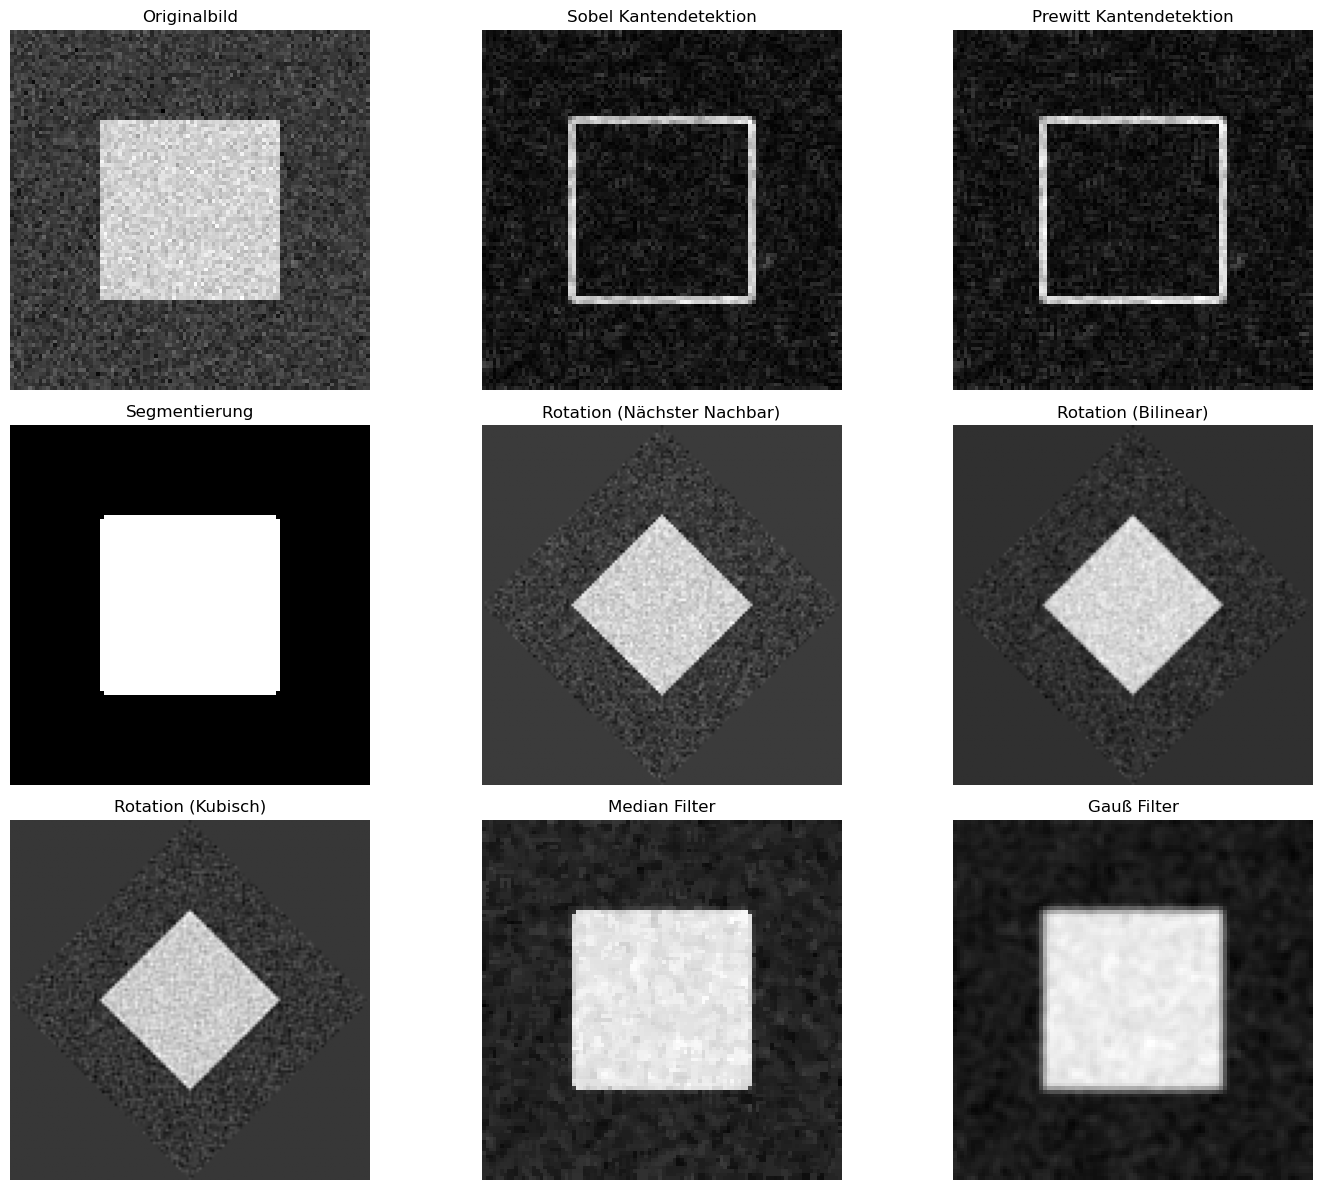

In [8]:
from scipy import ndimage
import matplotlib.pyplot as plt
import numpy as np

# Testbild erstellen
bild = np.zeros((100, 100))
bild[25:75, 25:75] = 1
bild = bild + np.random.normal(0, 0.1, bild.shape)

# Aufgabe a: Kantendetektion
sobel_x = ndimage.sobel(bild, axis=0)
sobel_y = ndimage.sobel(bild, axis=1)
kanten_sobel = np.hypot(sobel_x, sobel_y)
prewitt_x = ndimage.prewitt(bild, axis=0)
prewitt_y = ndimage.prewitt(bild, axis=1)
kanten_prewitt = np.hypot(prewitt_x, prewitt_y)

# Aufgabe b: Segmentierung
schwellwert = 0.5
maske = bild > schwellwert
maske = ndimage.binary_opening(maske)
maske = ndimage.binary_closing(maske)

# Aufgabe c: Rotation
winkel = 45
rot_nearest = ndimage.rotate(bild, winkel, order=0)  # Nächster Nachbar
rot_bilinear = ndimage.rotate(bild, winkel, order=1)  # Bilineare Interpolation
rot_cubic = ndimage.rotate(bild, winkel, order=3)     # Kubische Interpolation

# Aufgabe d: Rauschentfernung
median_gefiltert = ndimage.median_filter(bild, size=3)
gauss_gefiltert = ndimage.gaussian_filter(bild, sigma=1)

# Visualisierung
plt.figure(figsize=(15, 12))

# Original image
plt.subplot(331)
plt.imshow(bild, cmap='gray')
plt.title('Originalbild')
plt.axis('off')

# Edge detection
plt.subplot(332)
plt.imshow(kanten_sobel, cmap='gray')
plt.title('Sobel Kantendetektion')
plt.axis('off')

plt.subplot(333)
plt.imshow(kanten_prewitt, cmap='gray')
plt.title('Prewitt Kantendetektion')
plt.axis('off')

# Segmentation
plt.subplot(334)
plt.imshow(maske, cmap='gray')
plt.title('Segmentierung')
plt.axis('off')

# Rotation
plt.subplot(335)
plt.imshow(rot_nearest, cmap='gray')
plt.title('Rotation (Nächster Nachbar)')
plt.axis('off')

plt.subplot(336)
plt.imshow(rot_bilinear, cmap='gray')
plt.title('Rotation (Bilinear)')
plt.axis('off')

plt.subplot(337)
plt.imshow(rot_cubic, cmap='gray')
plt.title('Rotation (Kubisch)')
plt.axis('off')

# Noise removal
plt.subplot(338)
plt.imshow(median_gefiltert, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(339)
plt.imshow(gauss_gefiltert, cmap='gray')
plt.title('Gauß Filter')
plt.axis('off')

plt.tight_layout()
plt.show()

## Fazit:

SciPy bietet eine umfangreiche Sammlung von Werkzeugen für fortgeschrittene wissenschaftliche Berechnungen: <br>

- Die Signalverarbeitung ermöglicht komplexe Filteroperationen und Frequenzanalysen <br>
- Die lineare Algebra-Funktionen sind optimiert für numerische Stabilität <br>
- Die statistischen Funktionen decken die meisten gängigen Tests und Verteilungen ab <br>
- Die Bildverarbeitung unterstützt mehrdimensionale Arrays mit verschiedenen Filteroperationen <br>

In der Praxis werden diese Funktionen oft kombiniert, um komplexe wissenschaftliche Probleme zu lösen. <br>